In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

with open(r'D:\TFG\tfg_git\data\news\news3.pkl', 'rb') as f:
    data = pickle.load(f)

In [2]:
# extract domain from urls

from urllib.parse import urlparse

domain = urlparse(data["url"][1]).netloc
print(domain) # --> www.example.test

www.breitbart.com


In [3]:
domains = []
for i in data["url"]: 
    domains.append(urlparse(i).netloc)

In [9]:
domains_f = []
for i in domains:
    domains_f.append(i.replace("www.","").replace(".com",""))

In [10]:
top10media = pd.Series(domains_f).value_counts()[0:10]

In [11]:
len( pd.Series(domains).value_counts())

1408

In [12]:
print(top10media)

usnews            1086
news.yahoo         800
rawstory           744
medium             355
breitbart          338
msn                315
washingtonpost     312
freerepublic       299
arcamax            290
politico           288
dtype: int64


In [11]:
top10media.tolist()

[1086, 800, 744, 355, 338, 315, 312, 299, 290, 288]

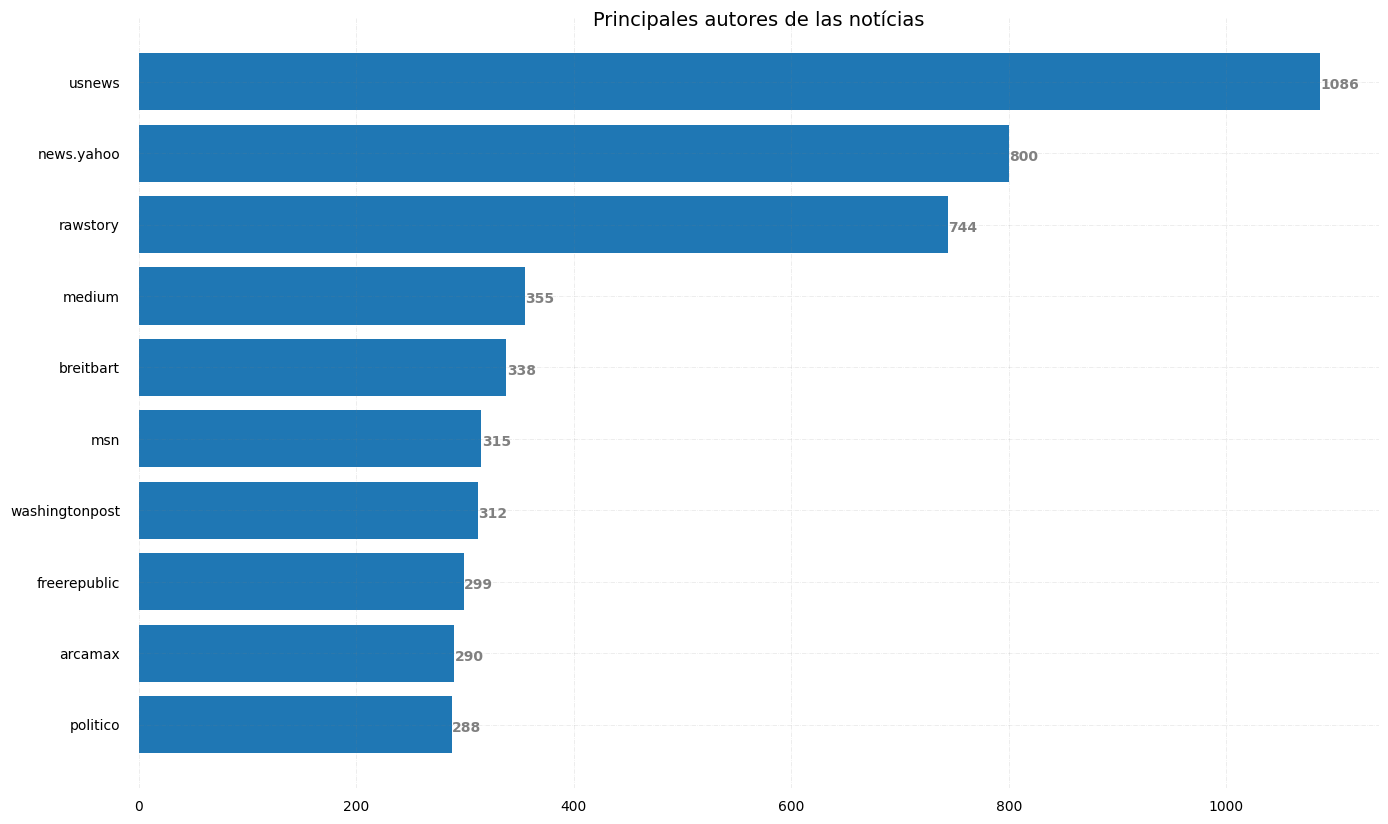

In [13]:
au = top10media.index.tolist()
n = top10media.tolist()
# Figure Size
fig, ax = plt.subplots(figsize =(16, 10))
 
# Horizontal Bar Plot
ax.barh(au, n)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
ax.set_title("Principales autores de las notícias", y=0.98, fontsize=14)
 
# Add Text watermark
#fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
#         color ='grey', ha ='right', va ='bottom',
#         alpha = 0.7)
 
# Show Plot
plt.show()